In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import warnings
from scipy import stats
from matplotlib import pylab as plt
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = 'all'

%reload_ext autoreload
%autoreload 2
%matplotlib inline

def set_seed(seed=42):
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
set_seed()

pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 30)

print("setup-complete!")

setup-complete!


In [4]:
# Accomodate raw path to variables
raw_customer, raw_orders = "./input/customers.csv", "./input/orders.csv"
raw_products, raw_sales = "./input/products.csv", "./input/sales.csv"

# Read-in data
customer, order = pd.read_csv(raw_customer), pd.read_csv(raw_orders)
product, sales_data = pd.read_csv(raw_products), pd.read_csv(raw_sales)

In [5]:
cust_order = pd.merge(left=customer, right=order, 
                      left_index=True, right_index=True) # merging
cop_data = pd.merge(left=cust_order, right=product, 
                    left_index=True, right_index=True) # merging

In [7]:
cop_data .head(5)

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-8-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,473,50490,2021-2-3,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia,3,774,46763,2021-10-8,2021-11-03,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia,4,433,39782,2021-5-6,2021-05-19,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia,5,441,14719,2021-3-23,2021-03-24,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


In [8]:
sales_data

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212
1,1,1,481,118,1,118
2,2,1,2,96,3,288
3,3,1,1002,106,2,212
4,4,1,691,113,3,339
...,...,...,...,...,...,...
4995,4995,998,321,109,2,218
4996,4996,998,251,95,3,285
4997,4997,999,872,113,1,113
4998,4998,999,998,106,2,212


In [9]:
# checking and visualizing the type of distribution of a feature column
def univariate_analysis(data, color, title1, title2):
    
    """
    Showing visualization of univariate
    analysis with displot and qqplot
    visualization from seaborn and statsmodel
    library.
    
    Parameters
    ----------
    data : DataFrame, array, or list of arrays, optional
        Dataset for plotting. If ``x`` and ``y`` are absent, this is
        interpreted as wide-form. Otherwise it is expected to be long-form. 
    title1: The title of the visualization, title1 for displot visualization
        And title2 for quantile plot from statsmodel.
    title2: The title of the visualization, title1 for displot visualization
        And title2 for quantile plot from statsmodel.
        
    Returns
    -------
    fig : matplotlib figure
        Returns the Figure object with the plot drawn onto it.
    """
    
    fig, (ax1, ax2) = plt.subplots( # subplots
        ncols=2, # num of cols
        nrows=1, # num of rows
        figsize=(20, 6) # set the width and high
    )

    sns.distplot( # create a distplot visualization
        data, # data
        ax=ax1, # axes 1
        kde=True, # kde
        color=color # color
    )
    
    ax1.set_title( # set the title 1
        title1, 
        weight="bold", # weight
        fontname="monospace", # font-name
        fontsize=25, # font-size
        pad=30 # padding
    )
    
    qqplot( # qqplot (quantile plot)
        data, # data
        ax=ax2, # axes 2
        line='s' # line 
    )
    
    ax2.set_title( # set the title 2
        title2, 
        weight="bold", # weight
        fontname="monospace", # font-name
        fontsize=25, # font-size
        pad=30 # padding
    )
    
    return fig # returning the figure

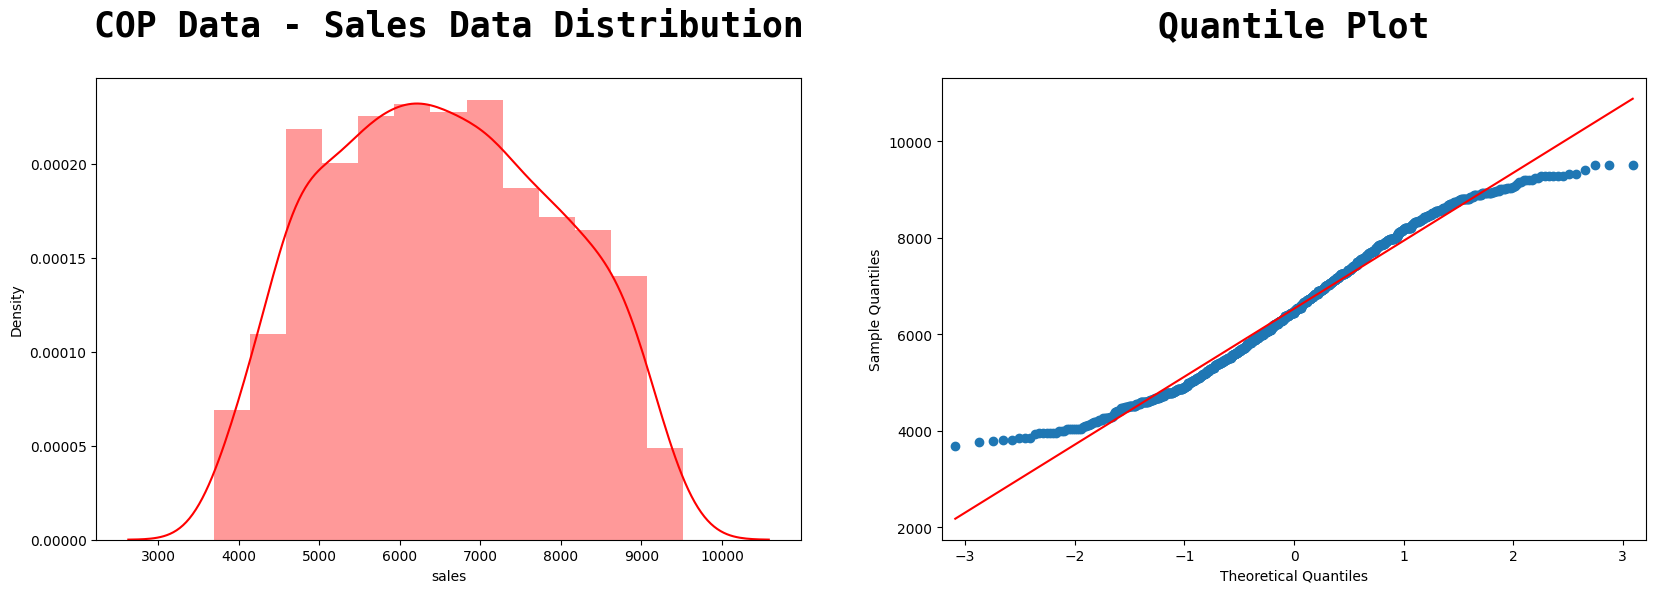

In [11]:
# Sales Data
cop_data["sales"] = cop_data["price"] * cop_data["quantity"] # let's make a sales data

univariate_analysis( # call the function
    data=cop_data['sales'], # put the data
    color='red', # pick the color
    title1='COP Data - Sales Data Distribution', # title1
    title2='Quantile Plot'); # title2